Prompt ablations for different ways of prompting LLMs to fill entire survey questionnaires

In [1]:
dir_discriminator = '../results/discriminator_test/'

In [2]:
import numpy as np
import pandas as pd

import sys
sys.path.append('..')
from plot_utils.plot_utils import plot_discriminator

In [3]:
from plot_utils.models import hf_models, model_names, model_sizes
models = list(set(hf_models) - set(['mpt', 'mpt-chat', 'mpt-instruct']))
models = sorted(models, key=lambda x: model_sizes[x])

"Question", "Answer" template resembling few-shot question answering tasks

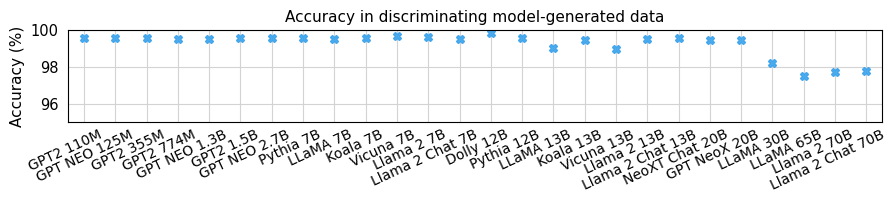

In [4]:
prompt = 'qa'
accuracies = {m: pd.read_csv(f'{dir_discriminator}{prompt}/{m}_accuracies.csv')['xgboost'] for m in models}
plot_discriminator(accuracies, models, model_names)

"Interviewer", "Me" template used by Argyle et al

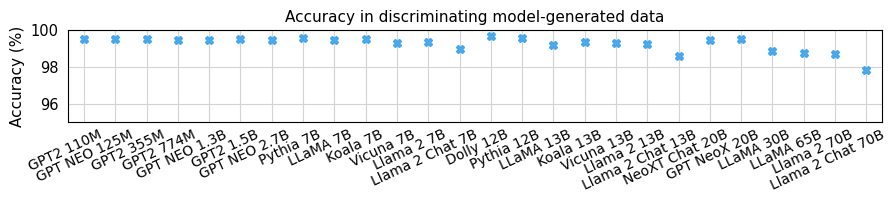

In [5]:
prompt = 'interview'
accuracies = {m: pd.read_csv(f'{dir_discriminator}{prompt}/{m}_accuracies.csv')['xgboost'] for m in models}
plot_discriminator(accuracies, models, model_names)